# Trabalho 6

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import norm

Importando as amostras

In [ ]:
df = pd.read_excel("../data/T6.xlsx") #Ler o arquivo excel de onde serão construídos os gráficos.

Ajeitando a tabela de parâmetros

In [ ]:
parametros = pd.read_excel("../data/tabelas.xlsx", header=None)
parametros = parametros.drop([0,1], axis=0)
parametros.columns = parametros.iloc[0].values
parametros = parametros.drop([2], axis = 0)
parametros.index = range(len(parametros))

Saving TEP00120 - TABELAS.xlsx to TEP00120 - TABELAS.xlsx
Saving T6.xlsx to T6.xlsx


Definindo funções úteis

In [ ]:
def parametro(p, n): #Definindo uma função para buscar o parâmetro desejado no dataframe parametros.
  p = str(p) #É o nome do parâmetro que desejamos encontrar.
  n = abs(int(n)) #É o tamanho de cada amostra.
  if n > len(parametros): #Suite para obter os valores da tabela.
    return parametros.loc[parametros.loc[len(parametros) - 1, "n"], p]
  elif n >= 2:
    return parametros.loc[n - 2, p]
  else:
    return 0

def graficosRXbarra(df):

  #CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE R:

  df['R'] = df.max(axis = 1) - df.min(axis = 1) #Cria a coluna R com as amplitudes de cada amostra.
  D3 = parametro('D3', len(df.drop(['R'], axis = 1).columns)) #Obtendo o parâmetro D3.
  D4 = parametro('D4', len(df.drop(['R'], axis = 1).columns)) #Obtendo o parâmetro D4.
  LM_R = df["R"].mean() #Calculando a Linha Média de R.
  LIC_R = LM_R * D3 #Calculando a Linha Inferior de Controle de R.
  LSC_R = LM_R * D4 #Calculando a Linha Superior de Controle de R.

  """
  O próximo bloco de códigos verifica se o R de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  R serão recalculados."""

  i = 0 #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"R"] < LIC_R or df.loc[i,"R"] > LSC_R:
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_R = df["R"].mean() #Recalculando a Linha Média de R.
      LIC_R = LM_R * D3 #Recalculando a Linha Inferior de Controle de R.
      LSC_R = LM_R * D4 #Recalculando a Linha Superior de Controle de R.
    i = i + 1

  #CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE XBARRA:

  df["Xbarra"] = df.drop(['R'], axis = 1).mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
  A2 = parametro("A2", len(df.drop(['R','Xbarra'], axis = 1).columns)) #Obtendo o parâmetro A2.
  LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
  LIC_Xbarra = LM_Xbarra - LM_R * A2 #Calculando a Linha Inferior de Controle de Xbarra.
  LSC_Xbarra = LM_Xbarra + LM_R * A2 #Calculando a Linha Superior de Controle de Xbarra.

  """
  O próximo bloco de códigos verifica se o Xbarra de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  Xbarra serão recalculados.
  """

  i = 0
  while i < len(df):
    if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
      LIC_Xbarra = LM_Xbarra - LM_R * A2 #Recalculando a Linha Inferior de Controle de Xbarra.
      LSC_Xbarra = LM_Xbarra + LM_R * A2 #Recalculando a Linha Superior de Controle de Xbarra.
    i = i + 1
  
  #CONSTRUINDO O GRÁFICO DE R:
  
  plt.plot(range(1, len(df) + 1),  df["R"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5)
  plt.hlines(LSC_R, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
  plt.hlines(LM_R, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
  plt.hlines(LIC_R, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
  plt.legend(['$R$', '$LSC_{R}$', '$LM_{R}$', '$LIC_{R}$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
  plt.grid(True)
  plt.title(
    "Gráfico de R",
    fontdict = {
      'family':'roboto',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "Amostras",
    fontdict = {
      'family':'raleway', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "R",
    fontdict = {
      'family':'raleway',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_R.png', format='png', dpi=300, bbox_inches='tight')
  
  graficoR = Image.open('Gráfico_R.png') #Armazena o gráfico de R em uma variável.
  plt.close() #Apaga o gráfico de R

  #CONSTRUINDO O GRÁFICO DE XBARRA:

  plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
  plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
  plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
  plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
  plt.legend(
    [
      '$\overline{X}$',
      '$LSC_{\overline{X}}$',
      '$LM_{\overline{X}}$',
      '$LIC_{\overline{X}}$'
    ],
    loc = 'right',
    bbox_to_anchor = (1.2, 0.3)
  )
  plt.grid(True)
  plt.title(
    "Gráfico de Xbarra",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "Amostras",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "$\overline{X}$",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_Xbarra.png', format='png', dpi=300, bbox_inches='tight') #Salva o gráfico em formato png.
  graficoXbarra = Image.open('Gráfico_Xbarra.png') #Armazena o gráfico de Xbarra em uma variável.
  plt.close() #Apaga toda o gráfico de R para construir o de Xbarra a seguir.

  return {
    'Dataframe': df,
    'Gráfico de R': graficoR,
    'LSC_R': LSC_R,
    'LM_R': LM_R,
    'LIC_R': LIC_R,
    'Gráfico de Xbarra': graficoXbarra,
    'LSC_Xbarra': LSC_Xbarra,
    'LM_Xbarra': LM_Xbarra,
    'LIC_Xbarra': LIC_Xbarra
  }

def graficosSXbarra(df): #Função que constrói os parâmetros de R e Xbarra.

  #CALCULANDO OS PARÂMETROS PARA CRIAR O GRÁFICO DE S:

  df["S"] = df.std(axis = 1) #Cria a coluna S com os desvios padrões das amostras.
  B3 = parametro("B3", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B3.
  B4 = parametro("B4", len(df.drop(['S'], axis = 1).columns)) #Obtendo o parâmetro B4.
  LM_S = df["S"].mean() #Calculando a Linha Média de S.
  LIC_S = LM_S * B3 #Calculando a Linha Inferior de Controle de S.
  LSC_S = LM_S * B4 #Calculando a Linha Superior de Controle de S.

  """
  O próximo bloco de códigos verifica se o R de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  R serão recalculados.
  """

  i = 0 #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"S"] < LIC_S or df.loc[i,"S"] > LSC_S: #Verifica se o S de uma amostra foge dos limites.
      df = df.drop([i], axis=0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_S = df["S"].mean() #Recalculando a Linha Média de S.
      LIC_S = LM_S * B3 #Recalculando a Linha Inferior de Controle de S.
      LSC_S = LM_S * B4 #Recalculando a Linha Superior de Controle de S.
    i = i + 1

  # CALCULANDO OS PARÂMETROS NECESSÁRIOS PARA CRIAR O GRÁFICO DE XBARRA:

  df["Xbarra"] = df.drop(['S'], axis = 1).mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
  A3 = parametro("A3", len(df.drop(['S', 'Xbarra'], axis = 1).columns)) #Obtendo o parâmetro A3.
  LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
  LIC_Xbarra = LM_Xbarra - LM_S * A3 #Calculando a Linha Inferior de Controle de Xbarra.
  LSC_Xbarra = LM_Xbarra + LM_S * A3 #Calculando a Linha Superior de Controle de Xbarra.

  """
  O próximo bloco de códigos verifica se o Xbarra de cada amostra
  se encontra dentro dos limites superior e inferior calculados anteriormente.
  Caso contrário, essa amostra será descartada e os limites e a média para
  Xbarra serão recalculados.
  """

  i = 0  #Definindo um contador para ser usado no código de iteração a seguir.
  while i < len(df):
    if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
      df = df.drop([i], axis = 0) #Deleta a linha.
      df.index = range(len(df)) #Atualiza os indices.
      LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
      LIC_Xbarra = LM_Xbarra - LM_S * A3 #Recalculando a Linha Inferior de Controle de Xbarra.
      LSC_Xbarra = LM_Xbarra + LM_S * A3 #Recalculando a Linha Superior de Controle de Xbarra.
    i = i + 1

  # CONSTRUINDO O GRÁFICO DE S:

  plt.plot(range(1, len(df) + 1),  df["S"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
  plt.hlines(LSC_S, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
  plt.hlines(LM_S, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
  plt.hlines(LIC_S, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
  plt.legend(['$S$', '$LSC_S$', '$LM_S$', '$LIC_S$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
  plt.grid(True)
  plt.title(
    "Gráfico de S",
    fontdict = {
      'family':'roboto',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel("Amostras", fontdict = {'family':'raleway', 
                                    'color':'black',
                                    'weight': 12,
                                    'size': 12}) #Adiciona um título para o eixo horizontal.
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel("S", fontdict = {'family':'raleway',
                              'color':'black',
                              'weight': 12,
                              'size': 12}) #Adiciona o título para o eixo vertical.
  plt.savefig('Gráfico_S.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  plt.close() #Fecha a área de plotagem do gráfico.
  
  graficoS = Image.open('Gráfico_S.png') #Armazena o gráfico de S em uma variável.

  # CONSTRUINDO O GRÁFICO DE XBARRA:

  plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
  plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
  plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
  plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
  plt.legend(
    [
      '$\overline{X}$',
      '$LSC_{\overline{X}}$',
      '$LM_{\overline{X}}$',
      '$LIC_{\overline{X}}$'
    ],
    loc = 'best',
    bbox_to_anchor=(1.2, 0.3)
  )
  plt.grid(True) #Adiciona grades de linhas.
  plt.title(
    "Gráfico de Xbarra",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "Amostras",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) # Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    "$\overline{X}$",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_Xbarra.png', format='png', dpi=300, bbox_inches='tight')
  plt.close()
  graficoXbarra = Image.open('Gráfico_Xbarra.png') # Armazena o gráfico de Xbarra em uma variável.

  return {
    'Dataframe': df,
    'Gráfico de S': graficoS,
    'LSC_S': LSC_S,
    'LM_S': LM_S,
    'LIC_S': LIC_S,
    'Gráfico de Xbarra': graficoXbarra,
    'LSC_Xbarra': LSC_Xbarra,
    'LM_Xbarra': LM_Xbarra,
    'LIC_Xbarra': LIC_Xbarra
  }

def graficosCEP(df): # Função que constrói os gráficos para o Controle Estatístico de Processos.
  n = len(df.columns) # Obtém o tamanho que cada amostra tem.
  if n < 11: # Se o tamanho das amostras forem menores do que 11, então ...
    return graficosRXbarra(df) # Constrói os gráficos de R e Xbarra.
  else:
    return graficosSXbarra(df) # Se não, constrói os de S e Xbarra.

findfont: Font family ['roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['raleway'] not found. Falling back to DejaVu Sans.


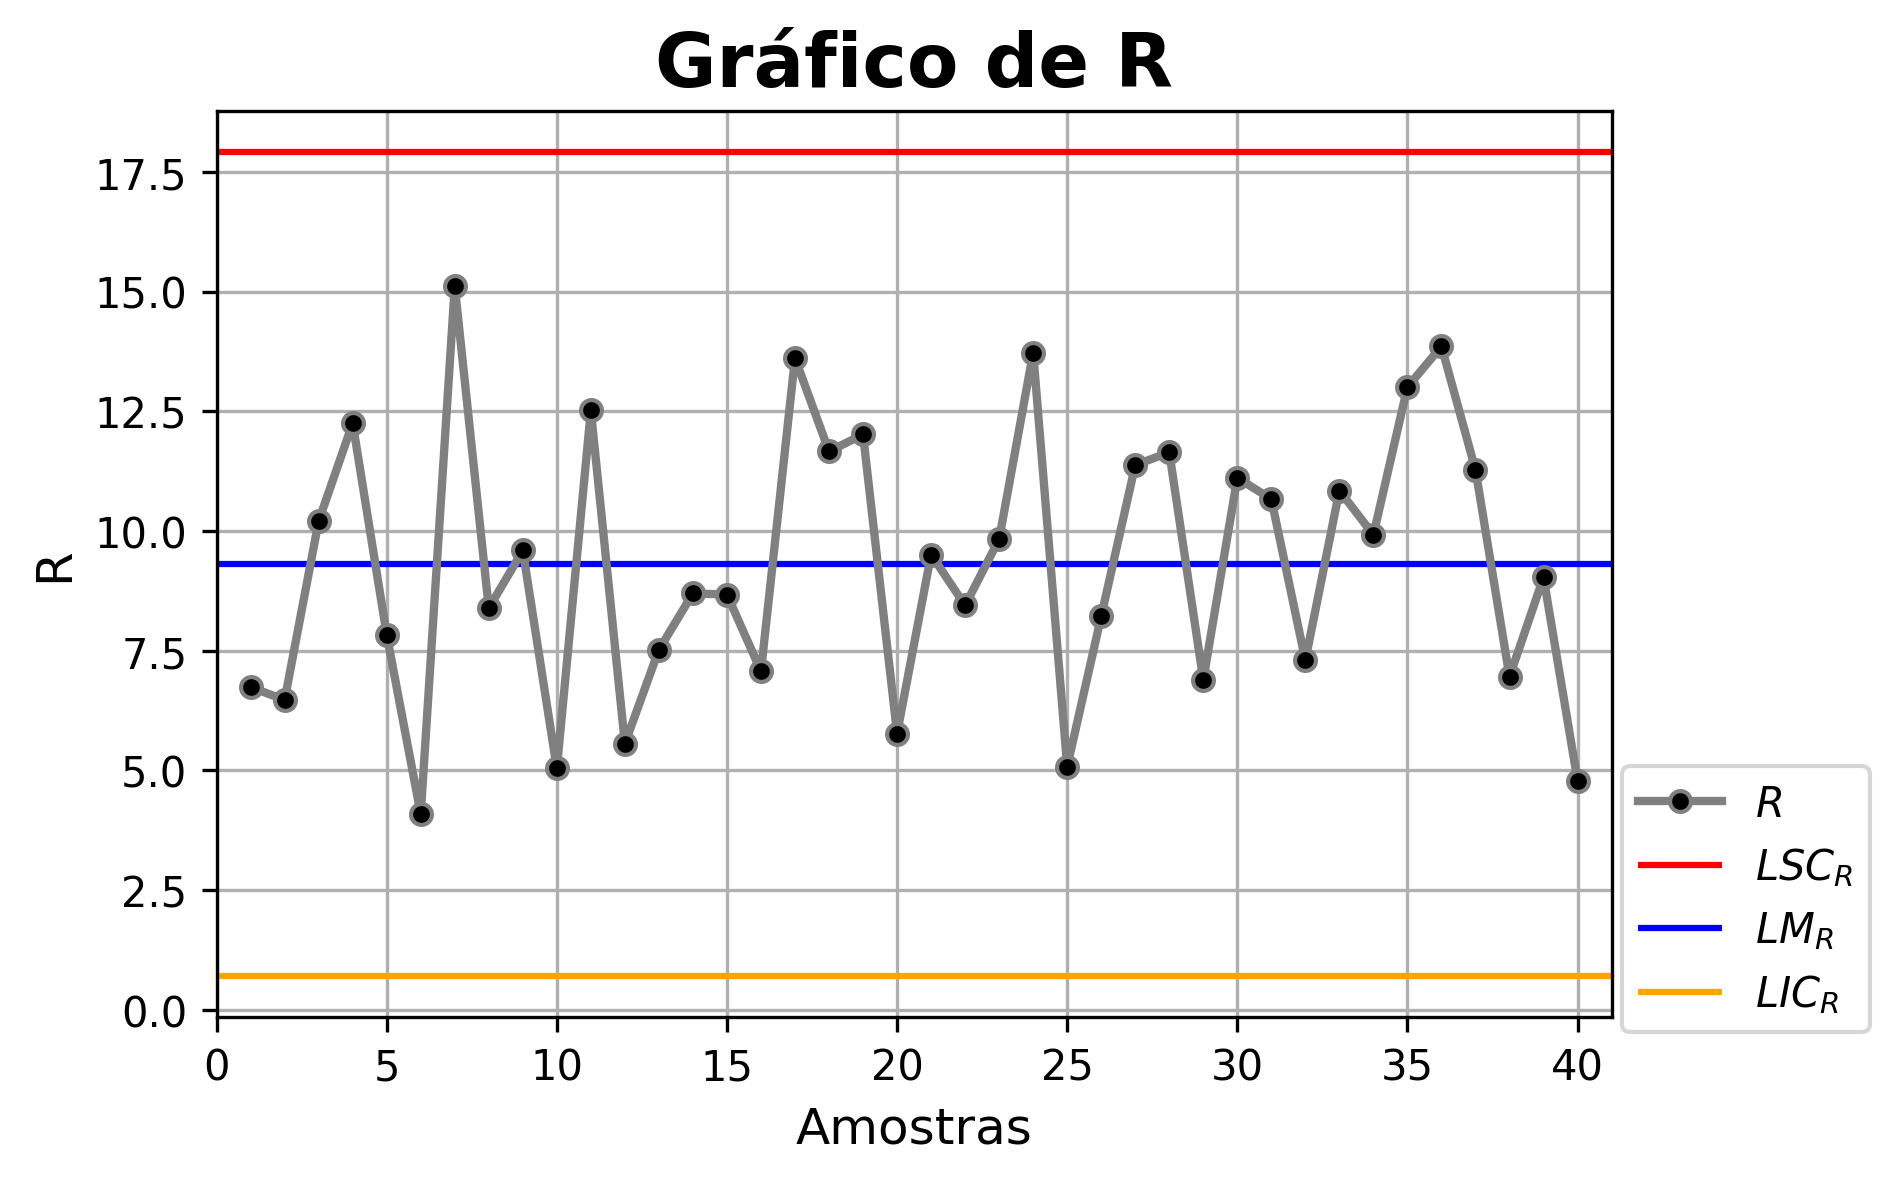

In [ ]:
CEP = graficosCEP(df.drop(['Amostra'], axis = 1)) #As informações do CEP são armazenados em uma variável.
CEP['Gráfico de R'] #Como se sabe que n = 7 < 11, então sabe-se que o Gráfico que temos é o de R, e não de S.

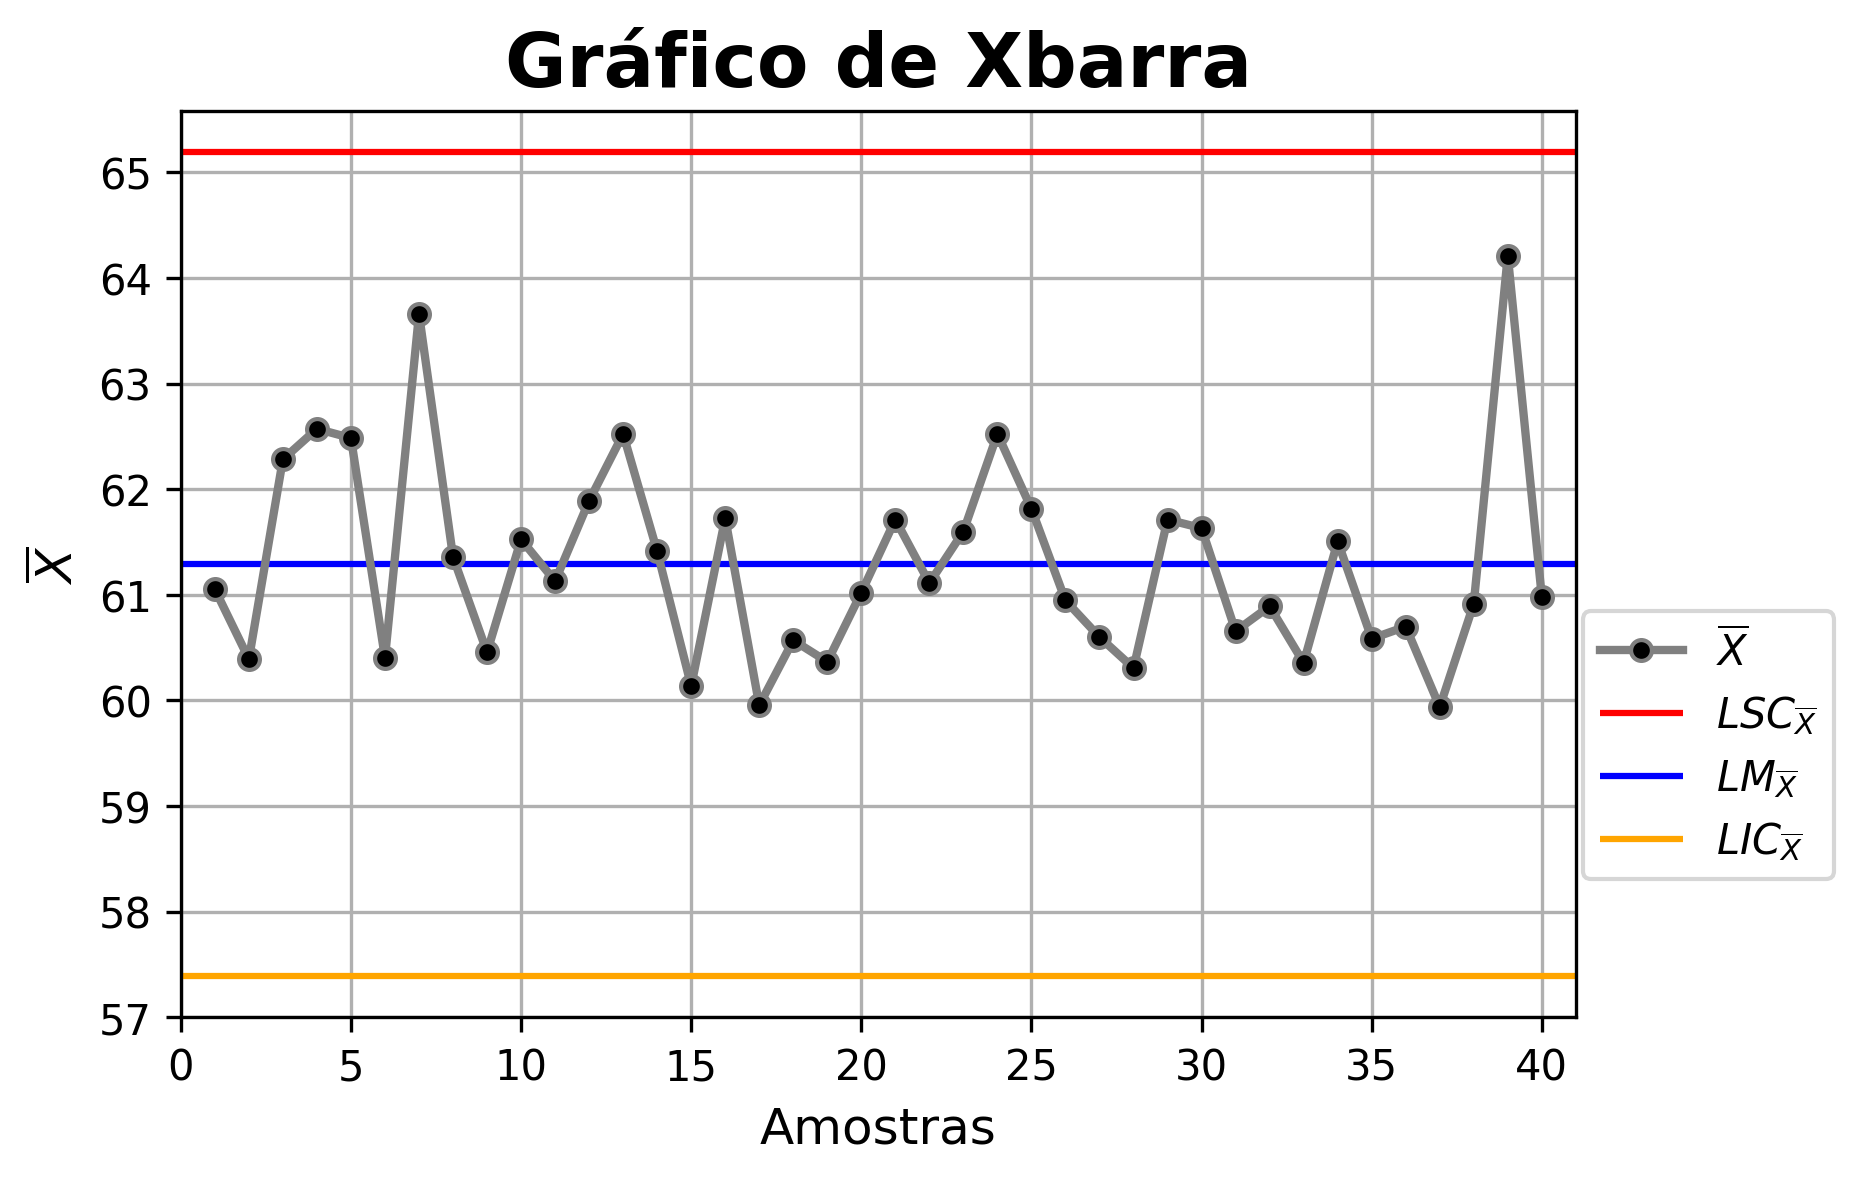

In [ ]:
CEP['Gráfico de Xbarra']

## Questão (b)

Calcule o percentual fora das especificações (PFE) do processo para um cliente que deseja peças com dimensão entre 60 e 65.

In [ ]:


def PFE(mu, sigma, LSE, LIE): #Definindo a função que calcula o Percentual Fora das Especificações.
  mu = float(mu) #Média populacional.
  sigma = float(sigma) #Desvio padrão populacional.
  LSE = float(LSE) #Limite Superior de Especificação.
  LIE = float(LIE) #Limite Inferior de Especificação.
  return norm.cdf((LIE - mu)/sigma) - norm.cdf((LSE - mu)/sigma) + 1 #Retorna a PFE.

d2 = parametro('d2', len(CEP['Dataframe'].drop(['R','Xbarra'], axis = 1).columns)) #Obtendo o parâmetro d2.
PFE(mu = CEP['LM_Xbarra'], sigma = CEP['LM_R']/d2, LSE = 65, LIE = 60) #49,45%

0.49449852586926546

## Questão (c)

Calcule os índices de capacidade do processo para as especificações do cliente.

## Questão (d)

Classifique o processo de acordo com os índices de capacidade do processo calculados.

In [ ]:
def ICPs(mu, sigma, LSE, LIE): #Definindo a função que retorna os Índices de Capacidade de Processo.
  mu = float(mu) #Média populacional.
  sigma = float(sigma) #Desvio padrão populacional.
  LSE = float(LSE) #Limite Superior de Especificação.
  LIE = float(LIE) #Limite Inferior de Especificação.
  Cp = (LSE - LIE)/(6*sigma)
  Cpk = min((LSE - mu)/(3*sigma), (mu - LIE)/(3*sigma))
  d = (LSE + LIE)/2 #Média aritmética entre LSE e LIE.
  Cpm = (LSE - LIE)/(6*(sigma**2 + (d - mu)**2)**0.5)

  if Cpk >= 4/3: #Classificando o processo segundo os valores de Cpk.
    Classificacao = 'Processo capaz'
  elif Cpk >= 1 and Cpk < 4/3:
    Classificacao = 'Processo razoavelmente capaz'
  else:
    Classificacao = 'Processo incapaz'

  if Cp < 1: #Classificando o processo segundo os valores de Cp.
    Classificacao += ' e inviável'
  elif Cp > 3:
    Classificacao += ' e de alta precisão'
  
  return {'Cp': Cp, 'Cpk': Cpk, 'Cpm': Cpm, 'Classificação': Classificacao} #Retorna um dicionário com os principais ICPs.

d2 = parametro('d2', len(CEP['Dataframe'].drop(['R','Xbarra'], axis = 1).columns)) #Obtendo o parâmetro d2.
ICPs(mu = CEP['LM_Xbarra'], sigma = CEP['LM_R']/d2, LSE = 65, LIE = 60) #Retorna os ICPs.

{'Classificacao': 'Processo incapaz e inviável',
 'Cp': 0.2420824100807985,
 'Cpk': 0.12491348610564872,
 'Cpm': 0.2283840012154639}